# The Ising model on Trees/General graphs


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from utils.gen_utils import create_lattice
from IsingModel import IsingModel
from main_tree import simulate_ising_model


/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


## Regular lattice

In [2]:
### setting the parameters ###
N = 25
J = 1.0
n_equilib_steps = 100
n_mcmc_steps = 100
n_samples = None
n_sample_interval = 10
step_algorithm = "wolff"
betas = [0.3,0.35, 0.4, 0.45,0.5]
temps = np.arange(0.5, 3.5, 0.5)

In [3]:
# create the structure 
nodes, neighbors = create_lattice(N)

## Thermalization process

2 Main ways to set the initial states:
- equally distributed spins -> corresponds to an $\beta = \infty$
- all spins aligned in the same direction -> corresponds to $\beta = 0$


In [47]:

nodes, neighbors = create_lattice(N)

init_types = {
    "random": np.random.choice([-1, 1], size=nodes.size),
    "aligned": np.ones(nodes.size, dtype=np.int8)
}
results = {}
results_mcmc = {}
for temp in temps:
    for init_type, init_spins in init_types.items():
        if init_type == "random":
            init_spins = np.random.choice([-1, 1], size=nodes.size)
        elif init_type == "aligned":
            init_spins = np.ones(nodes.size, dtype=np.int8)
        
        model = IsingModel(
            nodes=init_spins,
            neighbors=neighbors,
            temp = temp,
            J=J,
            n_equilib_steps=n_equilib_steps,
            n_mcmc_steps=n_mcmc_steps,
            n_samples=n_samples,
            n_sample_interval=n_sample_interval,
            step_algorithm=step_algorithm
        )

        model = simulate_ising_model(model)
        results[(temp, init_type)] = (model.energy_equil, model.magn_equil)
        results_mcmc[(temp, init_type)] = (model.energy_all, model.magn_all)


Temperature: 0.5 - Time taken: 46.570173025131226
Temperature: 0.5 - Time taken: 45.491276025772095
Temperature: 1.0 - Time taken: 49.162731647491455
Temperature: 1.0 - Time taken: 48.80364799499512
Temperature: 1.5 - Time taken: 49.79396390914917
Temperature: 1.5 - Time taken: 49.50709295272827
Temperature: 2.0 - Time taken: 43.111735820770264
Temperature: 2.0 - Time taken: 43.77275586128235
Temperature: 2.5 - Time taken: 5.043454885482788
Temperature: 2.5 - Time taken: 5.119866132736206
Temperature: 3.0 - Time taken: 1.0081968307495117
Temperature: 3.0 - Time taken: 1.0219929218292236


In [ ]:
# plot the neighbors using neighbors array
plt.figure(figsize=(20,20))
G = nx.Graph()
G.add_nodes_from(np.arange(nodes.size))
for i in range(nodes.size):
    # add position to the node 
    G.nodes[i]['pos'] = (i % N, i // N)
    for j in neighbors[i]:
        if j != -1:
            G.add_edge(i, j)

# plot the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos=pos, with_labels=True)
if False: plt.show()

In [ ]:
temps
results

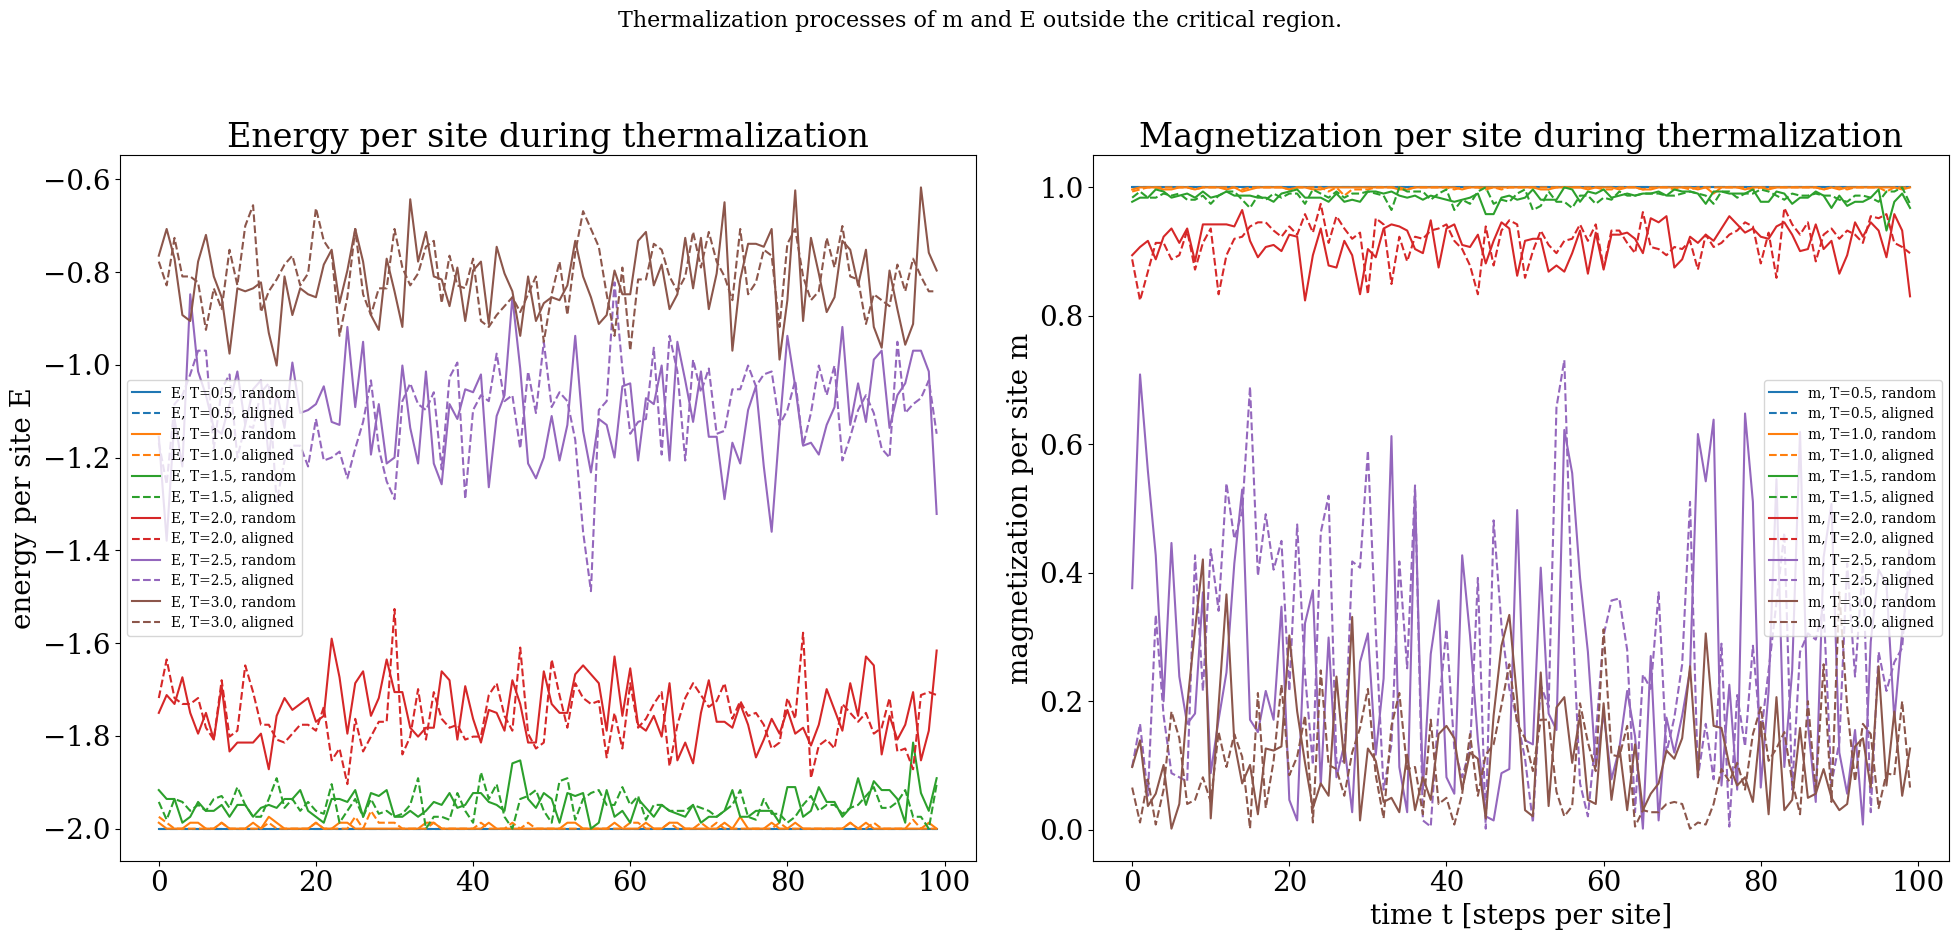

In [41]:
### plotting the results

max_timestep = 1000

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)
betas = [0.11080808080808081,2.2781818181818183,4.344747474747475]

# Define colors for betas and linestyles for init_types
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
beta_colors = colors[:len(temps)]
init_linestyles = ['-', '--']  # One linestyle per init_type

# First subplot: Energy per site
for idx, temp in enumerate(temps):
    for init_idx, (init_name, _) in enumerate(init_types.items()):
        energy, _ = results[(temp, init_name)]
        axes[0].plot(energy[:max_timestep], 
                     color=beta_colors[idx], 
                     linestyle=init_linestyles[init_idx], 
                     label=f"E, T={temp}, {init_name}")

axes[0].set_ylabel("energy per site E")
axes[0].legend(fontsize=10)
axes[0].set_title("Energy per site during thermalization")

# Second subplot: Magnetization per site
for idx, temp in enumerate(temps):
    for init_idx, (init_name, _) in enumerate(init_types.items()):
        _, magn = results[(temp, init_name)]
        axes[1].plot(magn[:max_timestep], 
                     color=beta_colors[idx], 
                     linestyle=init_linestyles[init_idx], 
                     label=f"m, T={temp}, {init_name}")

axes[1].set_xlabel("time t [steps per site]")
axes[1].set_ylabel("magnetization per site m")
axes[1].legend(fontsize=10)
axes[1].set_title("Magnetization per site during thermalization")

plt.suptitle("Thermalization processes of m and E outside the critical region.", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Autocorrelation

/var/folders/9q/lx6l777n2r74fbdg4g7ckqn40000gn/T/ipykernel_44728/1608914657.py:6: RuntimeWarning: invalid value encountered in divide
  return result / result[0]


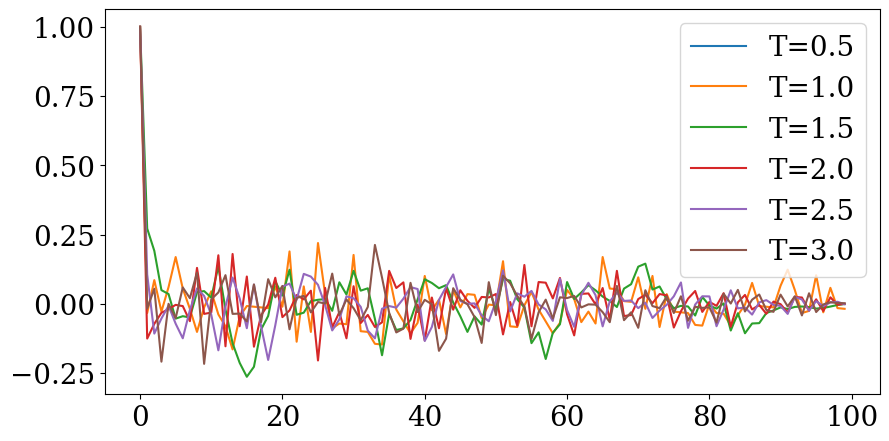

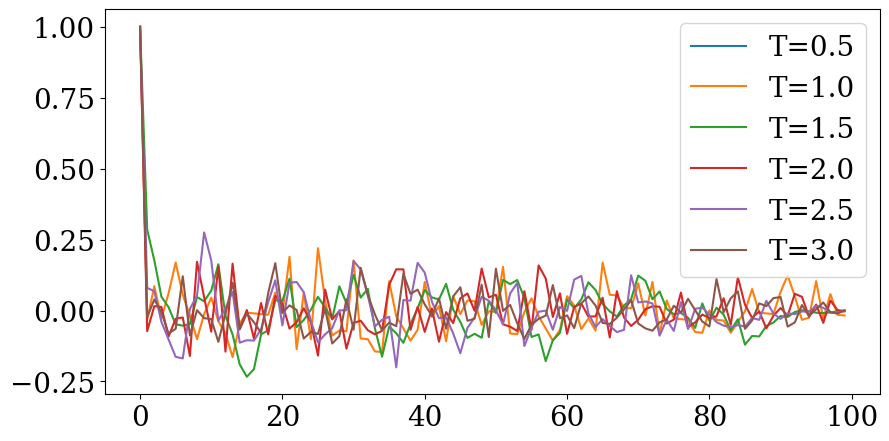

In [42]:
def autocorr(x):
    x = np.array(x)
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size // 2:]
    return result / result[0]

plt.figure(figsize=(10,5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

#betas = [0.3,0.35, 0.4, 0.45,0.5]
init_style = "random"
# energy autocorrelation
for i, temp in enumerate(temps):
    corr = autocorr(results_mcmc[(temp, init_style)][0])
    corr = corr[:500]
    plt.plot(corr, color=colors[i], label=f'T={temp}')

plt.legend()
plt.show()

plt.figure(figsize=(10,5))
# magnetization autocorrelation
for i, temp in enumerate(temps):
    corr = autocorr(results_mcmc[(temp, init_style)][1])
    corr = corr[:500]
    plt.plot(corr, color=colors[i], label=f'T={temp}')

plt.legend()
plt.show()

In [2]:
nodes, neighbors = create_lattice(15)

temps = np.linspace(0.01, 5.0, 100)
n_sample_interval = 5 # look at autocorrelation
n_equilib_steps = 100 # look at thermalization
n_mcmc_steps = 500 # gives us 100 samples
n_samples = None 
step_algorithm = "metropolis"

magn, energy, specific_heat, susceptibility = [], [], [], []

# for T in temps:
#     nodes = np.random.choice([-1, 1], size=nodes.size)
#     model = IsingModel(
#         nodes=nodes,
#         neighbors=neighbors,
#         temp=T,
#         J=1.0,
#         n_equilib_steps=n_equilib_steps,
#         n_mcmc_steps=n_mcmc_steps,
#         n_samples=n_samples,
#         n_sample_interval=n_sample_interval,
#         step_algorithm=step_algorithm
#     )
#     model = simulate_ising_model(model)
#     magn.append(model.avg_magn)
#     energy.append(model.avg_energy)
#     specific_heat.append(model.specific_heat)
#     susceptibility.append(model.susceptibility)

from main_tree import simulate_ising_full

results = simulate_ising_full(nodes, neighbors, 1.0, n_equilib_steps, n_mcmc_steps, n_samples, n_sample_interval, temps, step_algorithm, n_cores=5)

for t in results:
    print(t)
    magn.append(results[t].avg_magn)
    energy.append(results[t].avg_energy)
    specific_heat.append(results[t].specific_heat)
    susceptibility.append(results[t].susceptibility)


Using 5 processes


100%|██████████| 100/100 [00:00<00:00, 13773.95it/s]
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie

Temperature: 0.01 - Time taken: 7.9336559772491455
Temperature: 0.06040404040404041 - Time taken: 7.976847887039185
Temperature: 0.16121212121212125 - Time taken: 7.977334976196289
Temperature: 0.21161616161616165 - Time taken: 8.02489185333252
Temperature: 0.11080808080808081 - Time taken: 8.098533153533936
Temperature: 0.26202020202020204 - Time taken: 6.586440086364746
Temperature: 0.3628282828282829 - Time taken: 6.577833414077759
Temperature: 0.3124242424242425 - Time taken: 6.578839063644409
Temperature: 0.4132323232323233 - Time taken: 6.598612070083618
Temperature: 0.4636363636363637 - Time taken: 6.699711084365845
Temperature: 0.5140404040404041 - Time taken: 6.203734874725342
Temperature: 0.5644444444444445 - Time taken: 6.2098388671875
Temperature: 0.614848484848485 - Time taken: 6.233690977096558
Temperature: 0.6652525252525253 - Time taken: 6.2371909618377686
Temperature: 0.7156565656565658 - Time taken: 6.281536817550659
Temperature: 0.7660606060606061 - Time taken: 6.114

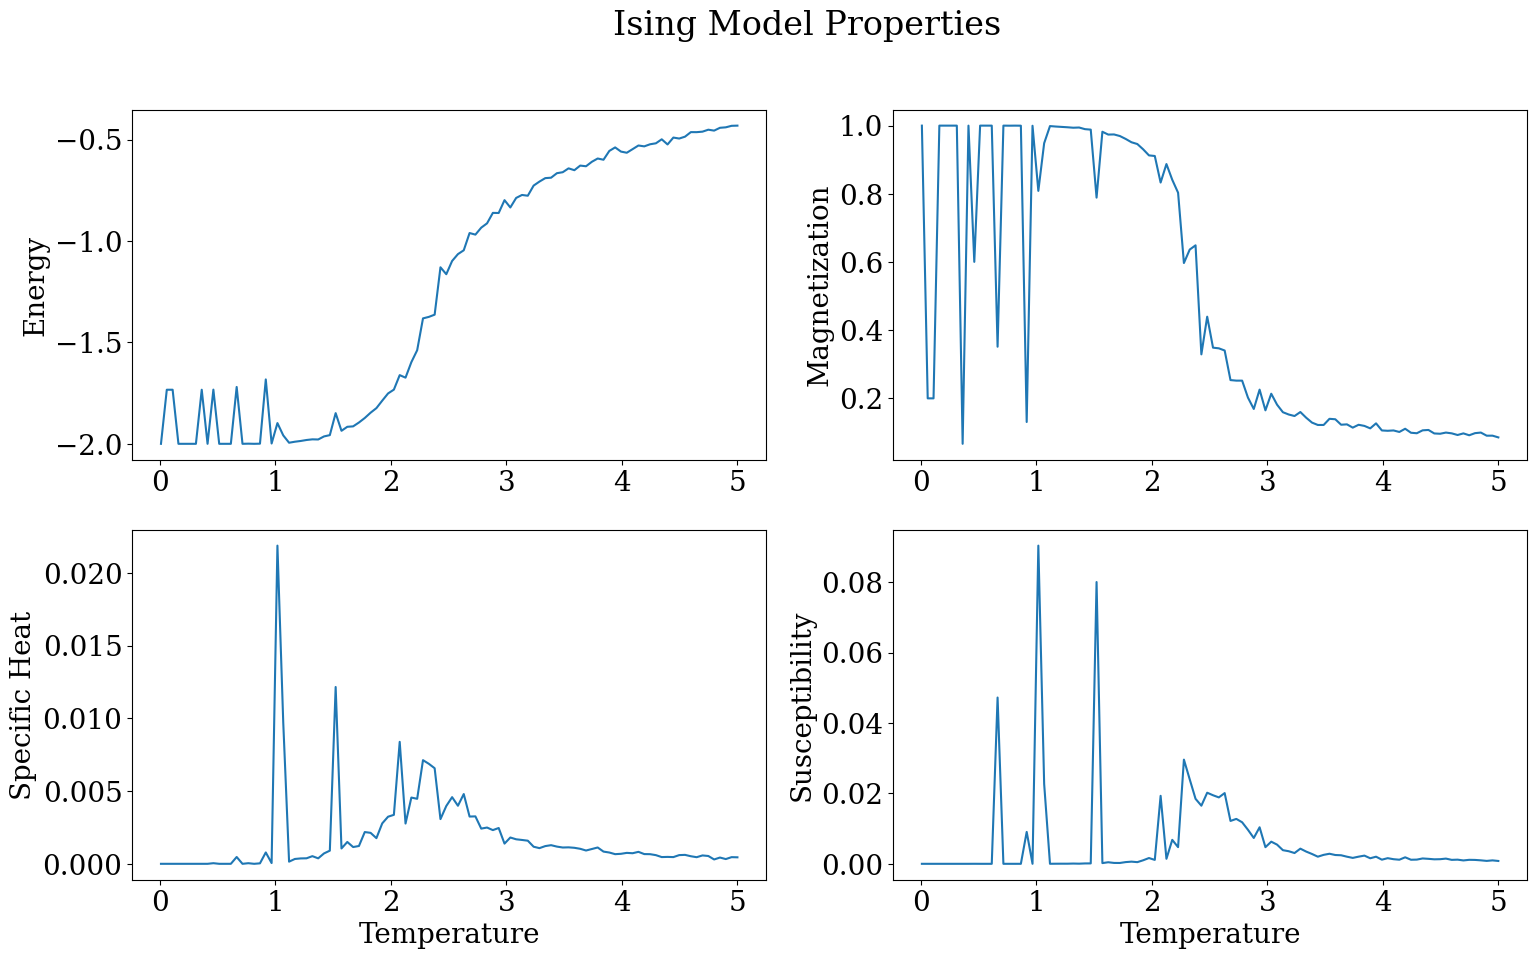

In [3]:
from utils.gen_utils import plot_magn_energy_spech_susc

plot_magn_energy_spech_susc(
    magn=magn,
    energy=energy,
    specific_heat=specific_heat,
    susceptibility=susceptibility,
    temps=temps,
    show=True
)

# Binary Tree

In [2]:
def create_binary_tree(depth:int):
    # Create a binary tree using NetworkX
    G = nx.balanced_tree(2, depth-1)  # 2 children per node, depth-1 levels
    
    # Initialize nodes array (all nodes start with value 1)
    nodes = np.ones(len(G))
    
    # Initialize neighbors array
    neighbors = np.zeros((len(G), 3))  # Changed to 3 to store [parent, child1, child2]
    neighbors.fill(-1)  # Default to no neighbors
    
    # For each node, get its neighbors (both children and parent)
    for node in sorted(G.nodes()):
        # Get all neighbors (both children and parent)
        all_neighbors = sorted(list(G.neighbors(node)))
        
        # For root node (node 0), it only has children
        if node == 0:
            if len(all_neighbors) == 2:
                neighbors[node] = np.array([-1, all_neighbors[0], all_neighbors[1]])
        # For other nodes, they have one parent and potentially two children
        else:
            # Find the parent (it's the neighbor with smaller index)
            parent = min(all_neighbors)
            # Find the children (they're the neighbors with larger indices)
            children = [n for n in all_neighbors if n > node]
            
            # Store parent and children
            if len(children) == 2:
                neighbors[node] = np.array([parent, children[0], children[1]])
            elif len(children) == 1:
                neighbors[node] = np.array([parent, children[0], -1])
            else:
                neighbors[node] = np.array([parent, -1, -1])
    
    # turn neighbors into list of ints
    neighbors = neighbors.astype(np.int32)
    
    # Debug print
    # print("Tree structure:")
    # for node in sorted(G.nodes()):
    #     print(f"Node {node}: [parent, child1, child2] = {neighbors[node]}")
    
    return nodes, neighbors

In [8]:
d = 5
J = 1.0
n_equilib_steps = 10
n_mcmc_steps = 100
n_samples = None
n_sample_interval = 10
step_algorithm = "metropolis"
betas = [0.3,0.35, 0.4, 0.45,0.5]

## Thermolization process
random and aligned init conditions

In [9]:
nodes, neighbors = create_binary_tree(depth = d)

In [10]:
print(nodes.shape)
print(neighbors.shape)

(31,)
(31, 3)


In [11]:
init_types = {
    "random": np.random.choice([-1, 1], size=nodes.size)
    #"aligned": np.ones(nodes.size, dtype=np.int8)
}
results = {}
results_mcmc = {}
for beta in betas:
    for init_type, init_spins in init_types.items():
        if init_type == "random":
            init_spins = np.random.choice([-1, 1], size=nodes.size)
        elif init_type == "aligned":
            init_spins = np.ones(nodes.size, dtype=np.int8)
        
        model = IsingModel(
            nodes=init_spins,
            neighbors=neighbors,
            temp = 1/beta,
            J=J,
            n_equilib_steps=n_equilib_steps,
            n_mcmc_steps=n_mcmc_steps,
            n_samples=n_samples,
            n_sample_interval=n_sample_interval,
            step_algorithm=step_algorithm
        )

        model = simulate_ising_model(model)
        results[(beta, init_type)] = (model.energy_equil, model.magn_equil)
        results_mcmc[(beta, init_type)] = (model.energy_all, model.magn_all)

Temperature: 3.3333333333333335 - Time taken: 0.026564836502075195
Temperature: 2.857142857142857 - Time taken: 0.0245819091796875
Temperature: 2.5 - Time taken: 0.025001049041748047
Temperature: 2.2222222222222223 - Time taken: 0.02493572235107422
Temperature: 2.0 - Time taken: 0.02387404441833496


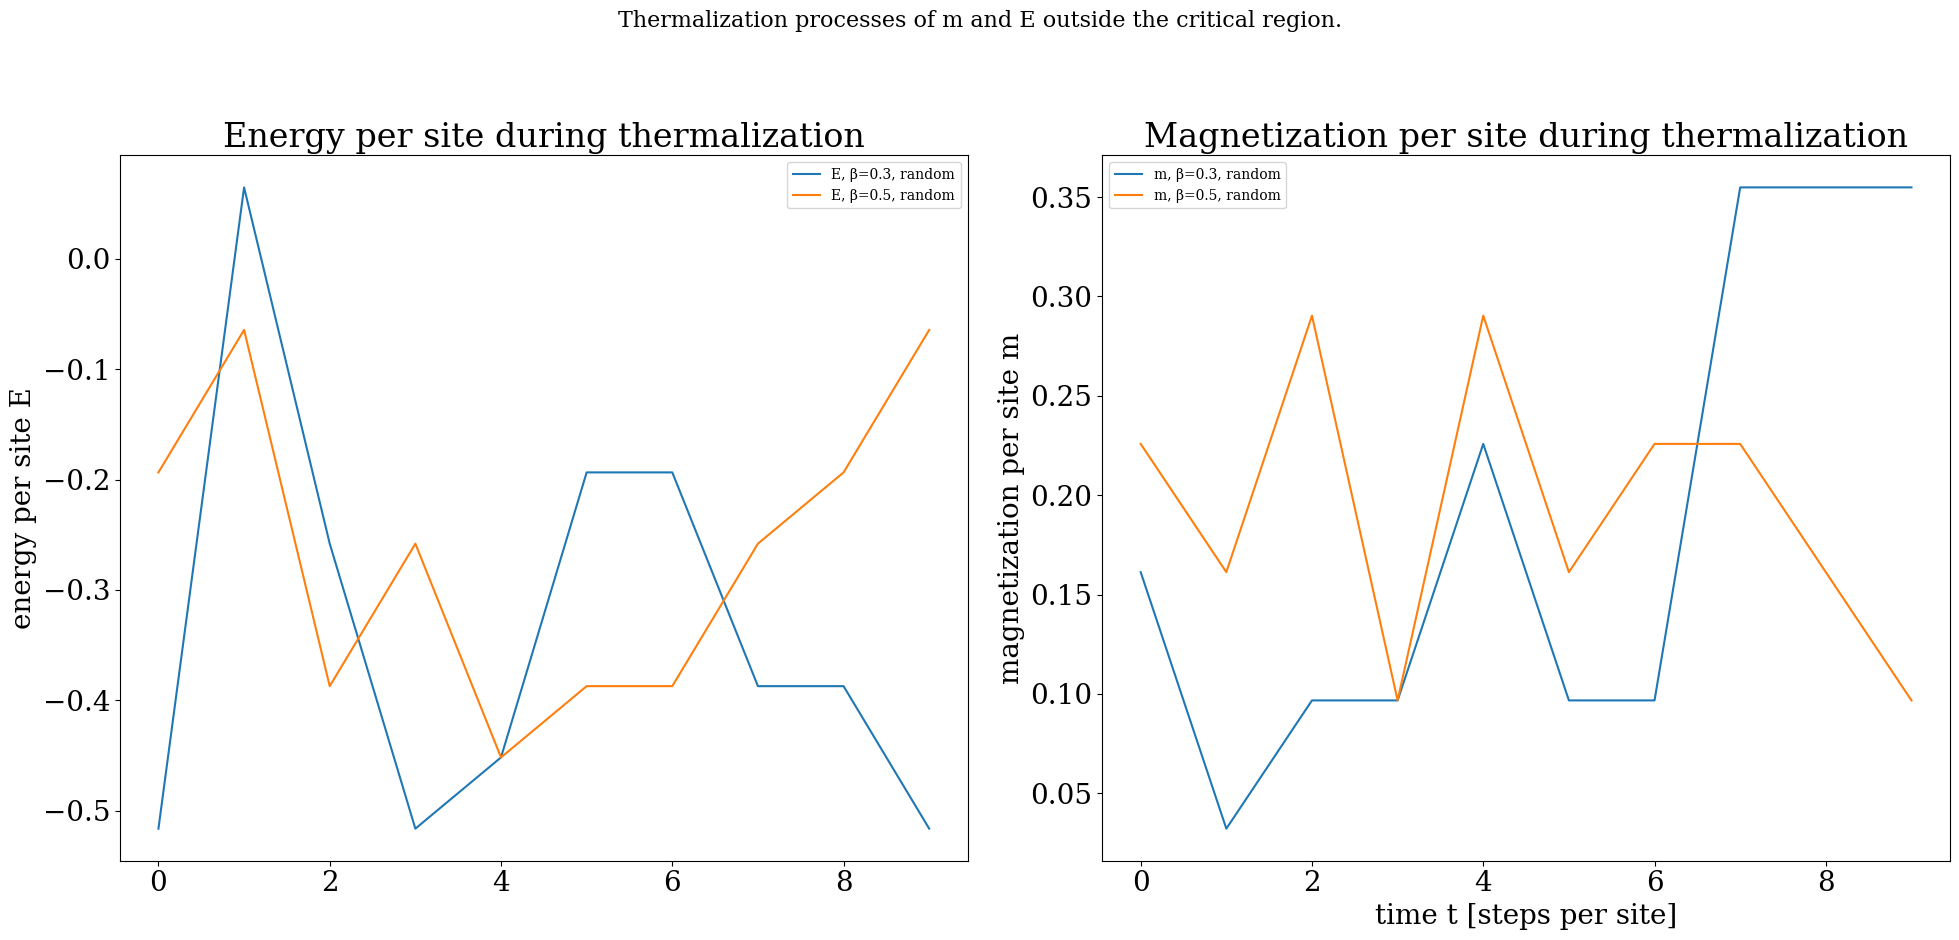

In [12]:
### Plotting the resutls ###

max_timestep = 2_000

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)
betas = [0.3, 0.4, 0.45]
betas = [0.3,0.5]

# Define colors for betas and linestyles for init_types
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
beta_colors = colors[:len(betas)]
init_linestyles = ['-', '--']  # One linestyle per init_type

# First subplot: Energy per site
for idx, beta in enumerate(betas):
    for init_idx, (init_name, _) in enumerate(init_types.items()):
        energy, _ = results[(beta, init_name)]
        axes[0].plot(energy[:max_timestep], 
                     color=beta_colors[idx], 
                     linestyle=init_linestyles[init_idx], 
                     label=f"E, β={beta}, {init_name}")

axes[0].set_ylabel("energy per site E")
axes[0].legend(fontsize=10)
axes[0].set_title("Energy per site during thermalization")

# Second subplot: Magnetization per site
for idx, beta in enumerate(betas):
    for init_idx, (init_name, _) in enumerate(init_types.items()):
        _, magn = results[(beta, init_name)]
        axes[1].plot(magn[:max_timestep], 
                     color=beta_colors[idx], 
                     linestyle=init_linestyles[init_idx], 
                     label=f"m, β={beta}, {init_name}")

axes[1].set_xlabel("time t [steps per site]")
axes[1].set_ylabel("magnetization per site m")
axes[1].legend(fontsize=10)
axes[1].set_title("Magnetization per site during thermalization")

plt.suptitle("Thermalization processes of m and E outside the critical region.", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

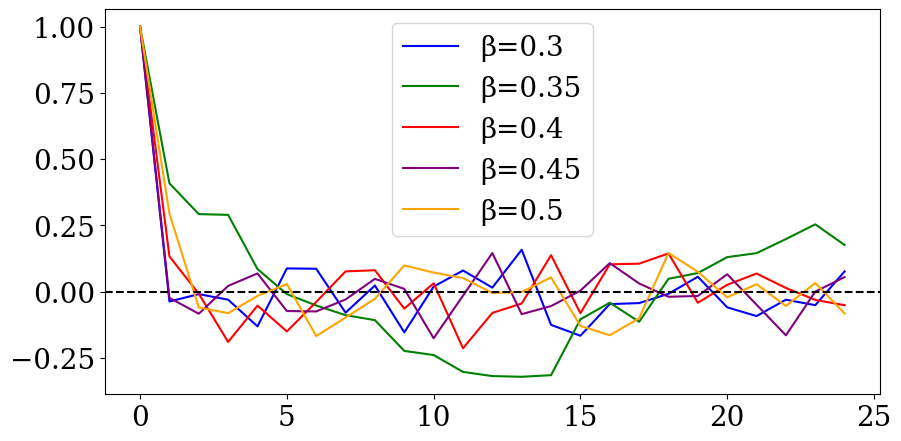

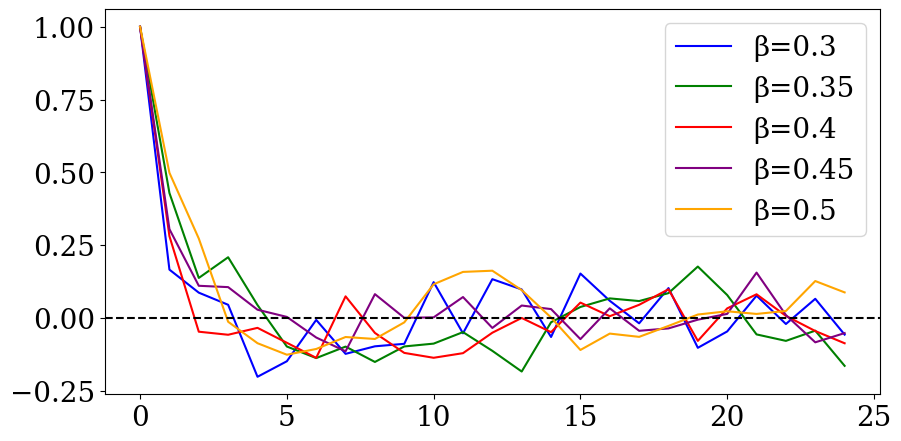

In [13]:
from utils.gen_utils import autocorr
plt.figure(figsize=(10,5))
colors = ['blue', 'green', 'red', 'purple', 'orange']

betas = [0.3,0.35, 0.4, 0.45,0.5]
init_style = "random"
# energy autocorrelation
for i, beta in enumerate(betas):
    corr = autocorr(results_mcmc[(beta, init_style)][0])
    corr = corr[:500]
    plt.plot(corr, color=colors[i], label=f'β={beta}')
# plot the horizontal line
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
# magnetization autocorrelation
for i, beta in enumerate(betas):
    corr = autocorr(results_mcmc[(beta, init_style)][1])
    corr = corr[:500]
    plt.plot(corr, color=colors[i], label=f'β={beta}')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from utils.gen_utils import create_lattice
from IsingModel import IsingModel
from main_tree import simulate_ising_model

/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [ ]:
from main_tree import simulate_ising_full
from wandb_run import create_d_ary_tree
#nodes, neighbors = create_binary_tree(d)

# lets do this on a larger tree
d = 2
depth = 10
nodes, neighbors = create_d_ary_tree(depth=depth, d=d)
#nodes, neighbors = create_binary_tree(d)
print(nodes.shape)

h = 3.0
temps = np.arange(0.01, 3.0, 0.1)
temps = np.linspace(0.01, 7.0, 100)
n_sample_interval = 1 # look at autocorrelation
n_equilib_steps = 3 # look at thermalization
n_mcmc_steps = 100 # gives us 100 samples
n_samples = None 
step_algorithm = "metropolis"

results = simulate_ising_full(nodes, neighbors, 1.0, n_equilib_steps, n_mcmc_steps, n_samples, n_sample_interval, temps, step_algorithm=step_algorithm, h=h, n_cores=6)

magn, energy, specific_heat, susceptibility = [], [], [], []
for t in temps:
    magn.append(results[t].avg_magn)
    energy.append(results[t].avg_energy)
    specific_heat.append(results[t].specific_heat)
    susceptibility.append(results[t].susceptibility)




(341,)
Using 6 processes


100%|██████████| 100/100 [00:00<00:00, 14246.96it/s]
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie/miniconda3/envs/ising/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/nicolasdebie

Temperature: 0.36303030303030304 - Time taken: 8.072139024734497
Temperature: 0.0806060606060606 - Time taken: 8.270128011703491
Temperature: 0.2924242424242424 - Time taken: 8.290666818618774
Temperature: 0.01 - Time taken: 8.306503057479858
Temperature: 0.15121212121212121 - Time taken: 8.334724187850952
Temperature: 0.2218181818181818 - Time taken: 8.330504894256592
Temperature: 0.7866666666666666 - Time taken: 3.172128915786743
Temperature: 0.7160606060606061 - Time taken: 3.887144088745117
Temperature: 0.6454545454545454 - Time taken: 4.561128854751587
Temperature: 0.5748484848484848 - Time taken: 5.439501762390137
Temperature: 0.8572727272727272 - Time taken: 2.478097915649414
Temperature: 0.9278787878787879 - Time taken: 1.9934649467468262
Temperature: 0.5042424242424242 - Time taken: 6.163311243057251
Temperature: 0.9984848484848484 - Time taken: 1.5745537281036377
Temperature: 0.4336363636363636 - Time taken: 6.783066034317017
Temperature: 1.3515151515151516 - Time taken: 0.61

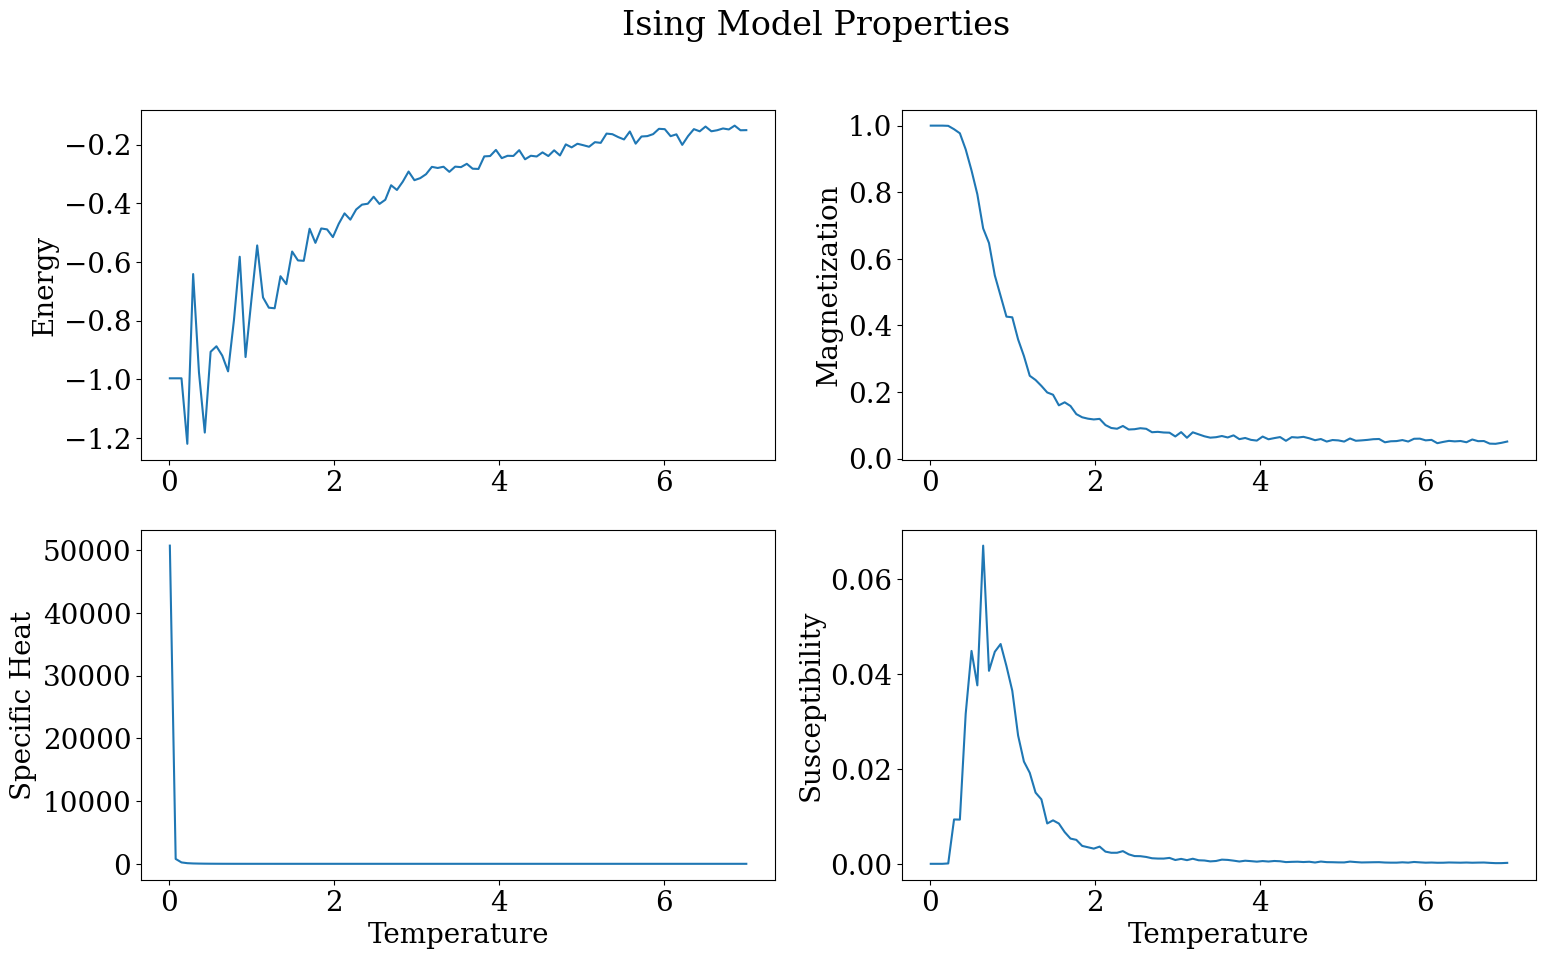

In [3]:
from utils.gen_utils import plot_magn_energy_spech_susc
plot_magn_energy_spech_susc(
    magn=magn,
    energy=energy,
    specific_heat=specific_heat,
    susceptibility=susceptibility,
    temps=temps,
    show=True
)
# metropolis d=4 -> h=3.0
# wolff

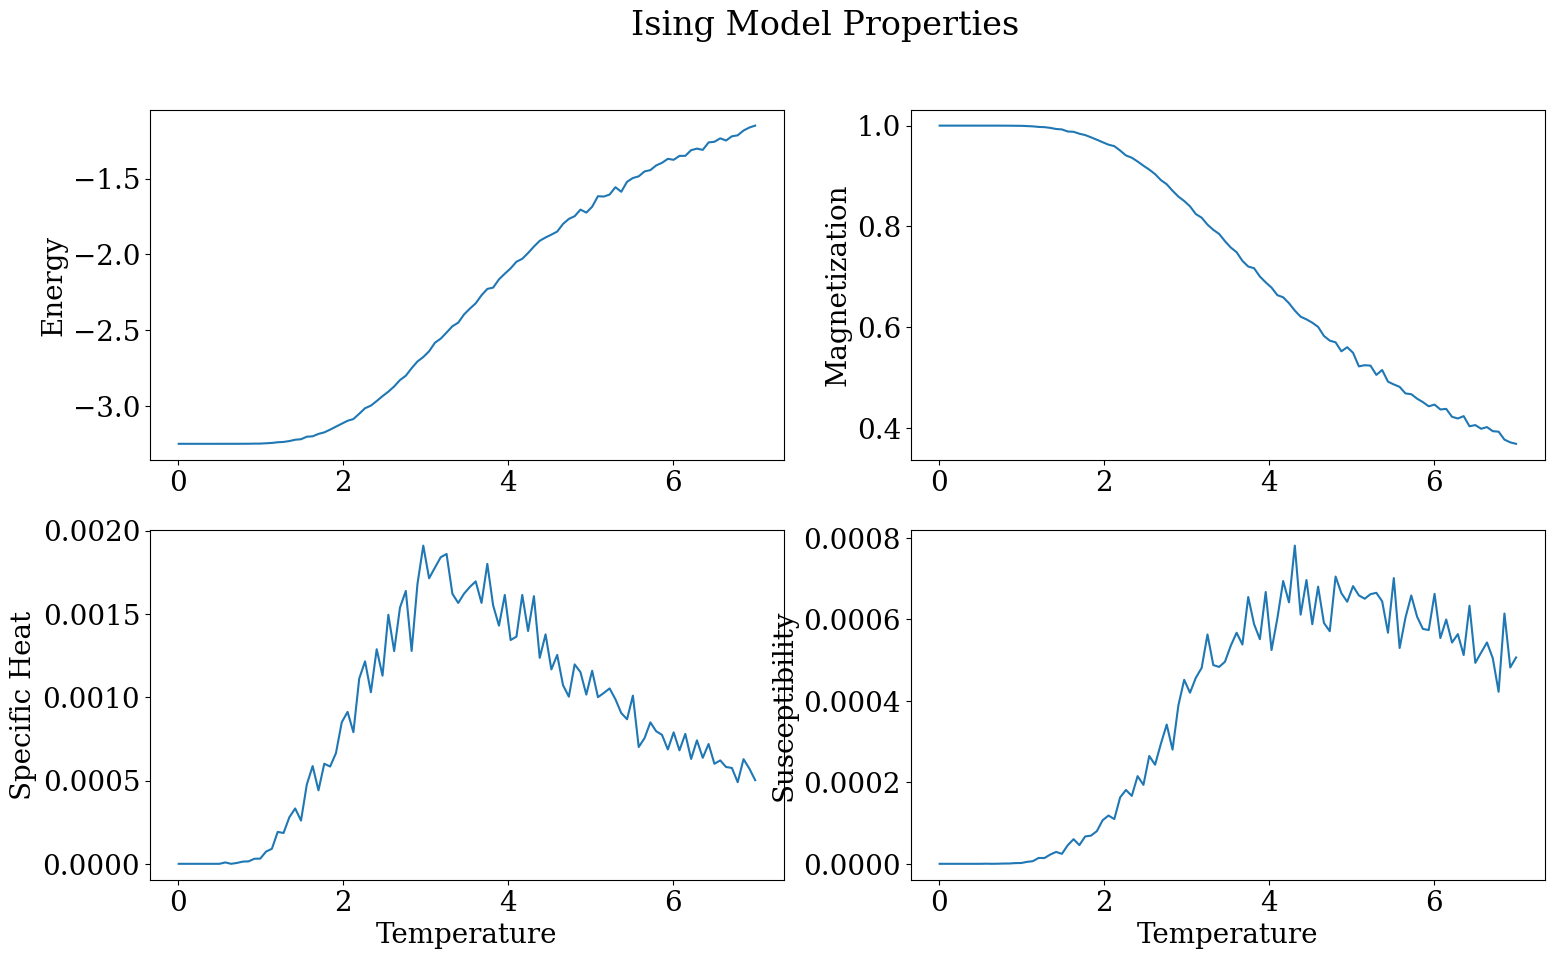

In [11]:
from utils.gen_utils import plot_magn_energy_spech_susc
plot_magn_energy_spech_susc(
    magn=magn,
    energy=energy,
    specific_heat=specific_heat,
    susceptibility=susceptibility,
    temps=temps,
    show=True
)
# metropolis d=4 -> h=3.0

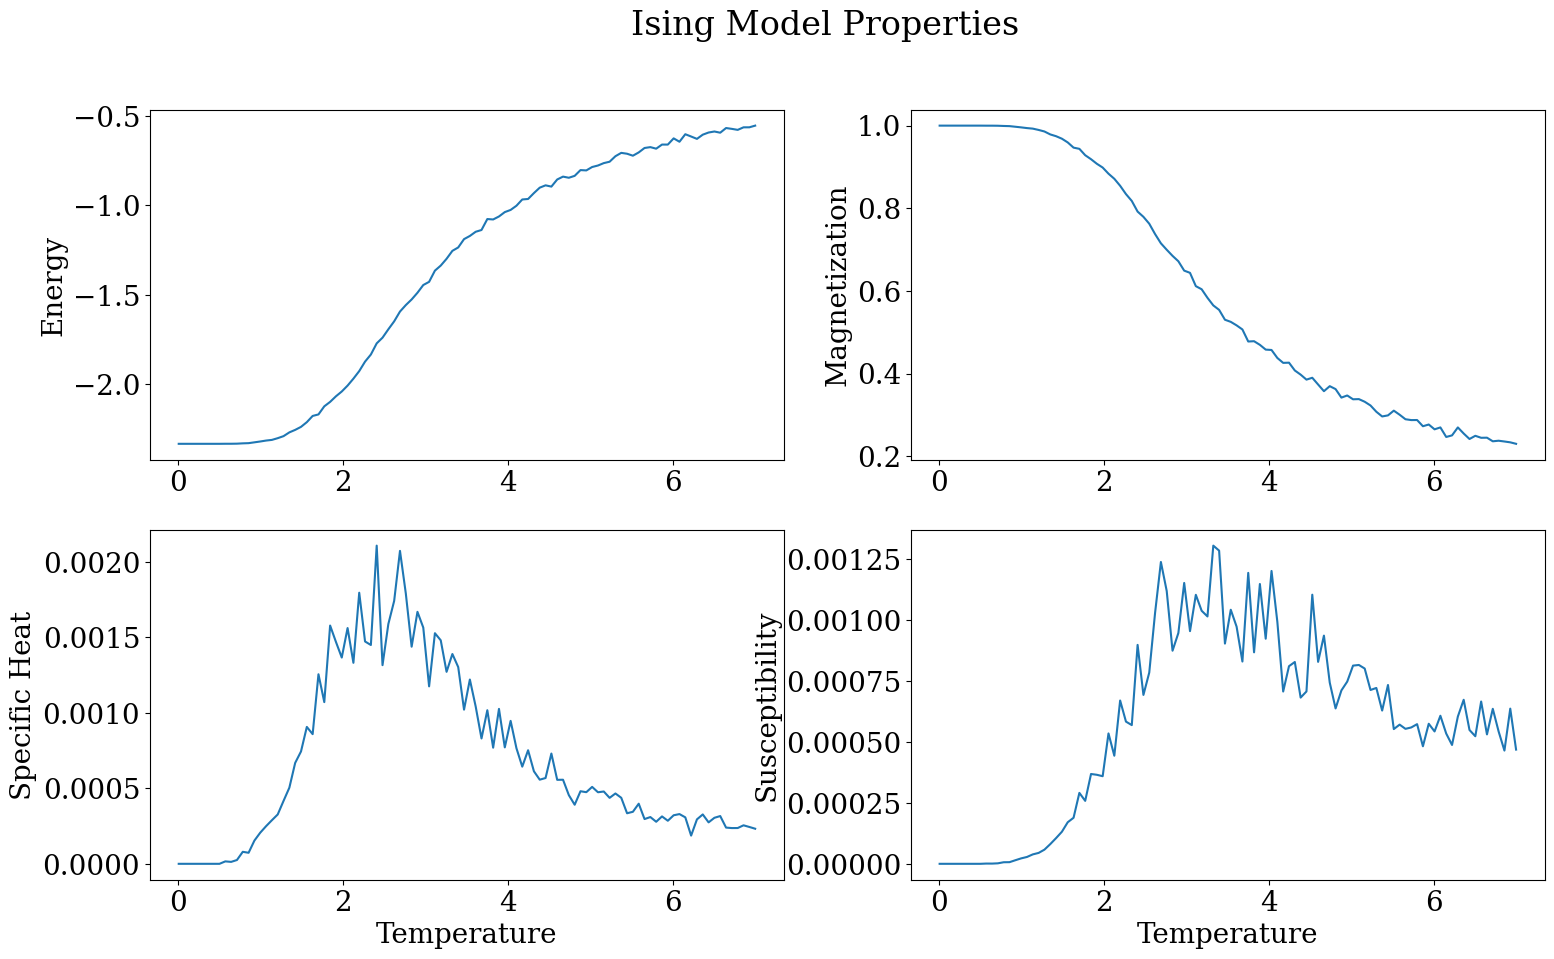

In [6]:
from utils.gen_utils import plot_magn_energy_spech_susc
plot_magn_energy_spech_susc(
    magn=magn,
    energy=energy,
    specific_heat=specific_heat,
    susceptibility=susceptibility,
    temps=temps,
    show=True
)
# metropolis d=3 -> h=2.0

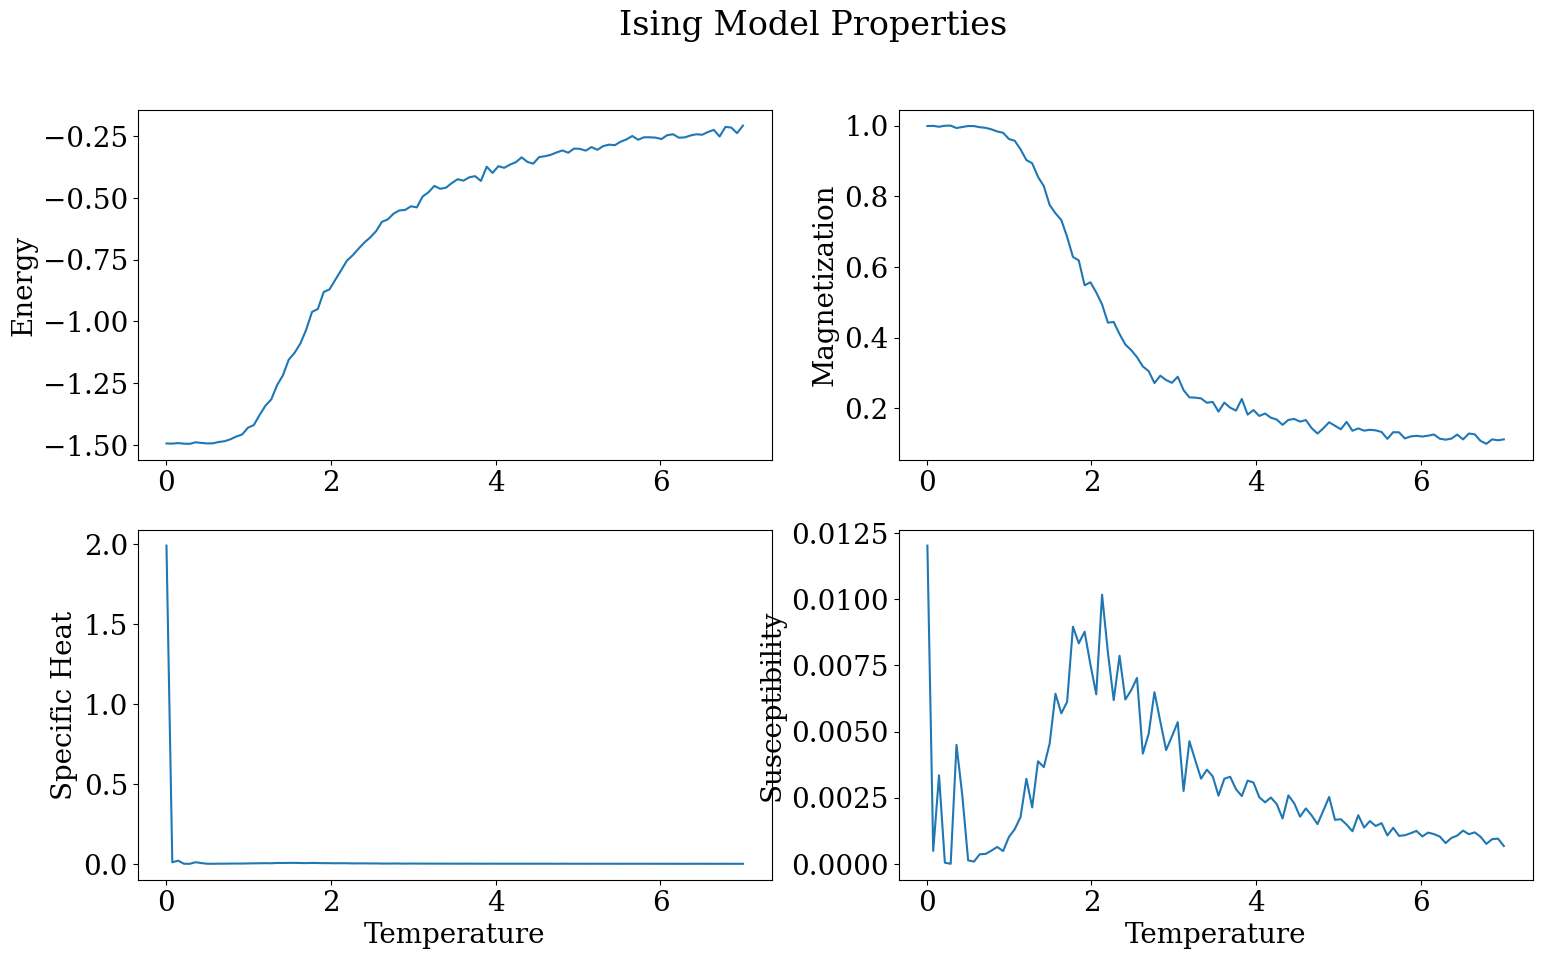

In [ ]:
from utils.gen_utils import plot_magn_energy_spech_susc
plot_magn_energy_spech_susc(
    magn=magn,
    energy=energy,
    specific_heat=specific_heat,
    susceptibility=susceptibility,
    temps=temps,
    show=True
)
# metropolis d=2 -> h=1.0

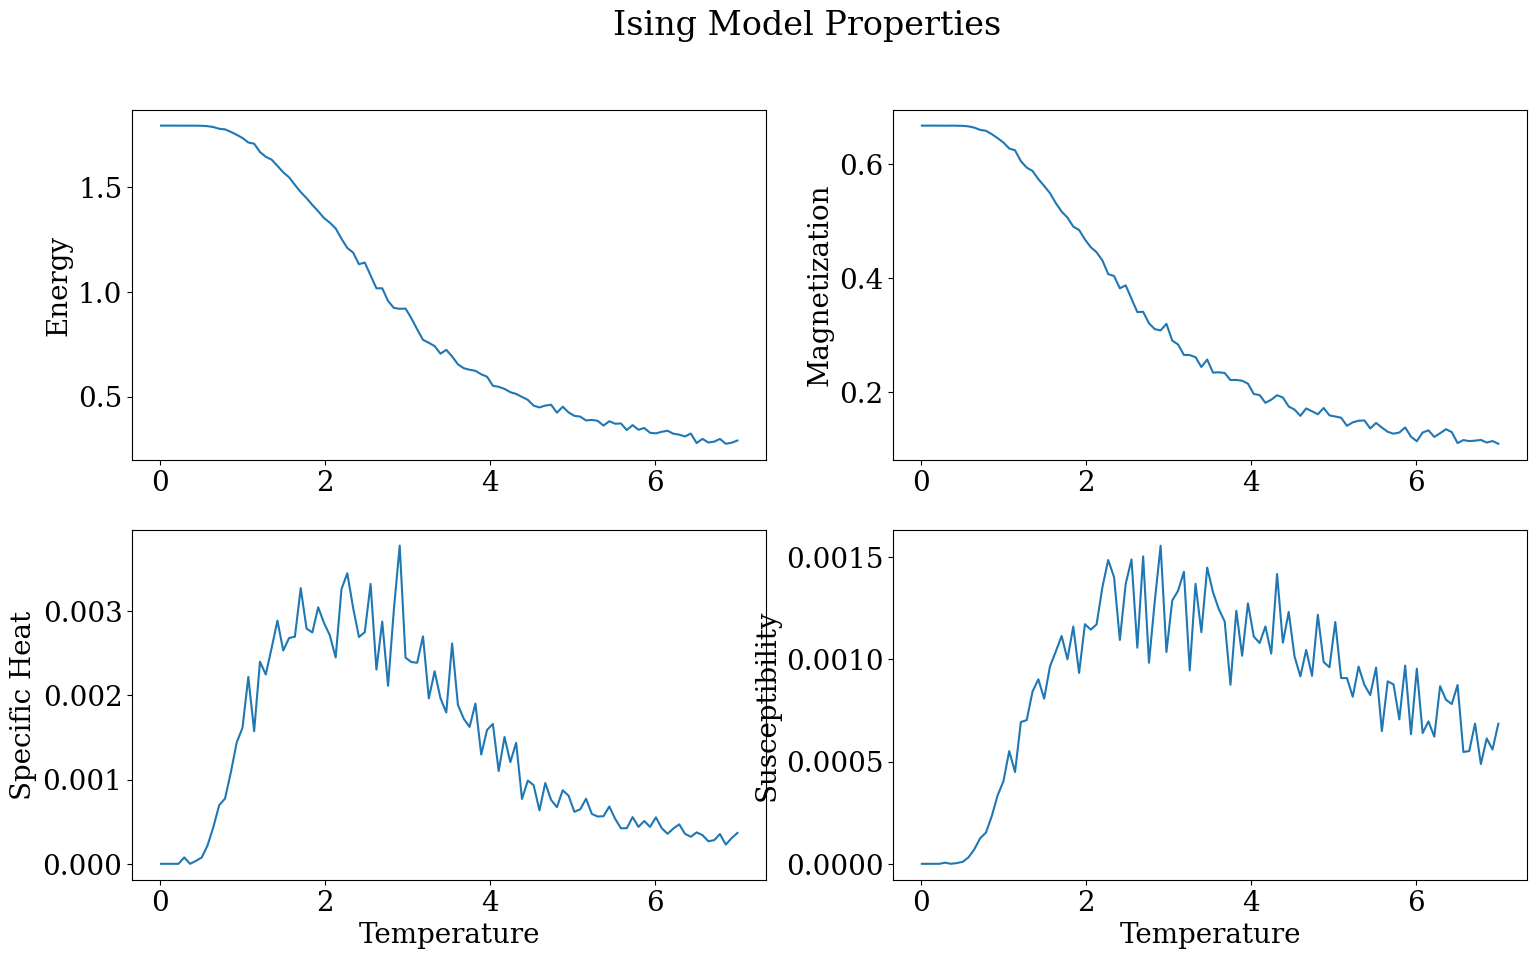

In [3]:
from utils.gen_utils import plot_magn_energy_spech_susc
plot_magn_energy_spech_susc(
    magn=magn,
    energy=energy,
    specific_heat=specific_heat,
    susceptibility=susceptibility,
    temps=temps,
    show=True
)
# glauber d=3

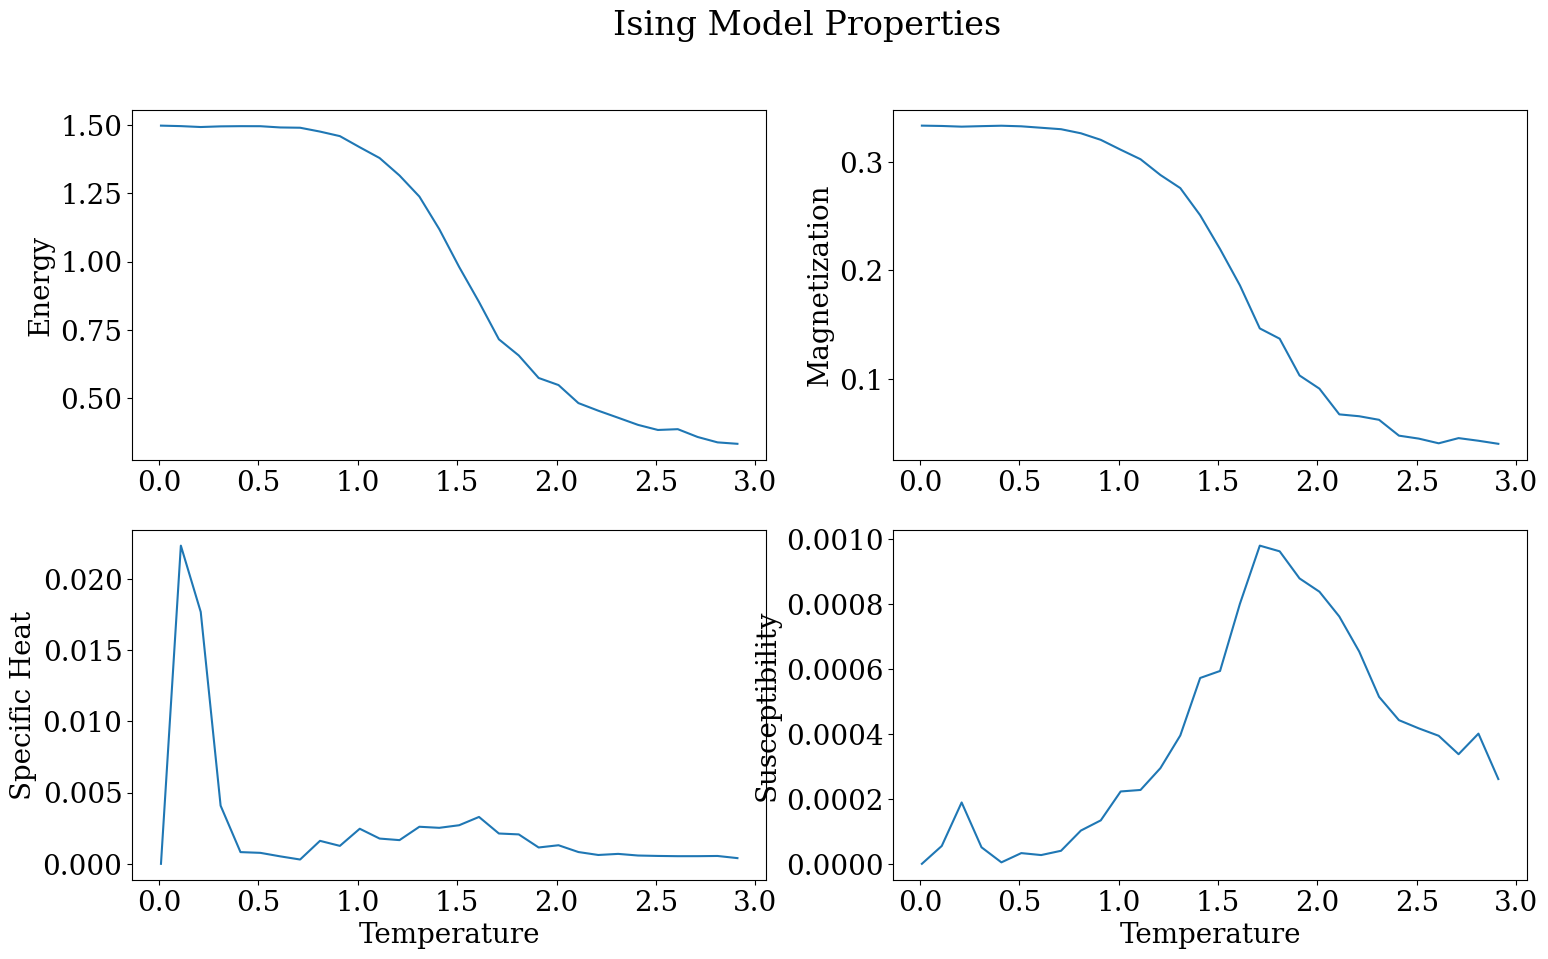

In [5]:
from utils.gen_utils import plot_magn_energy_spech_susc
plot_magn_energy_spech_susc(
    magn=magn,
    energy=energy,
    specific_heat=specific_heat,
    susceptibility=susceptibility,
    temps=temps,
    show=True
)
# glauber d=2

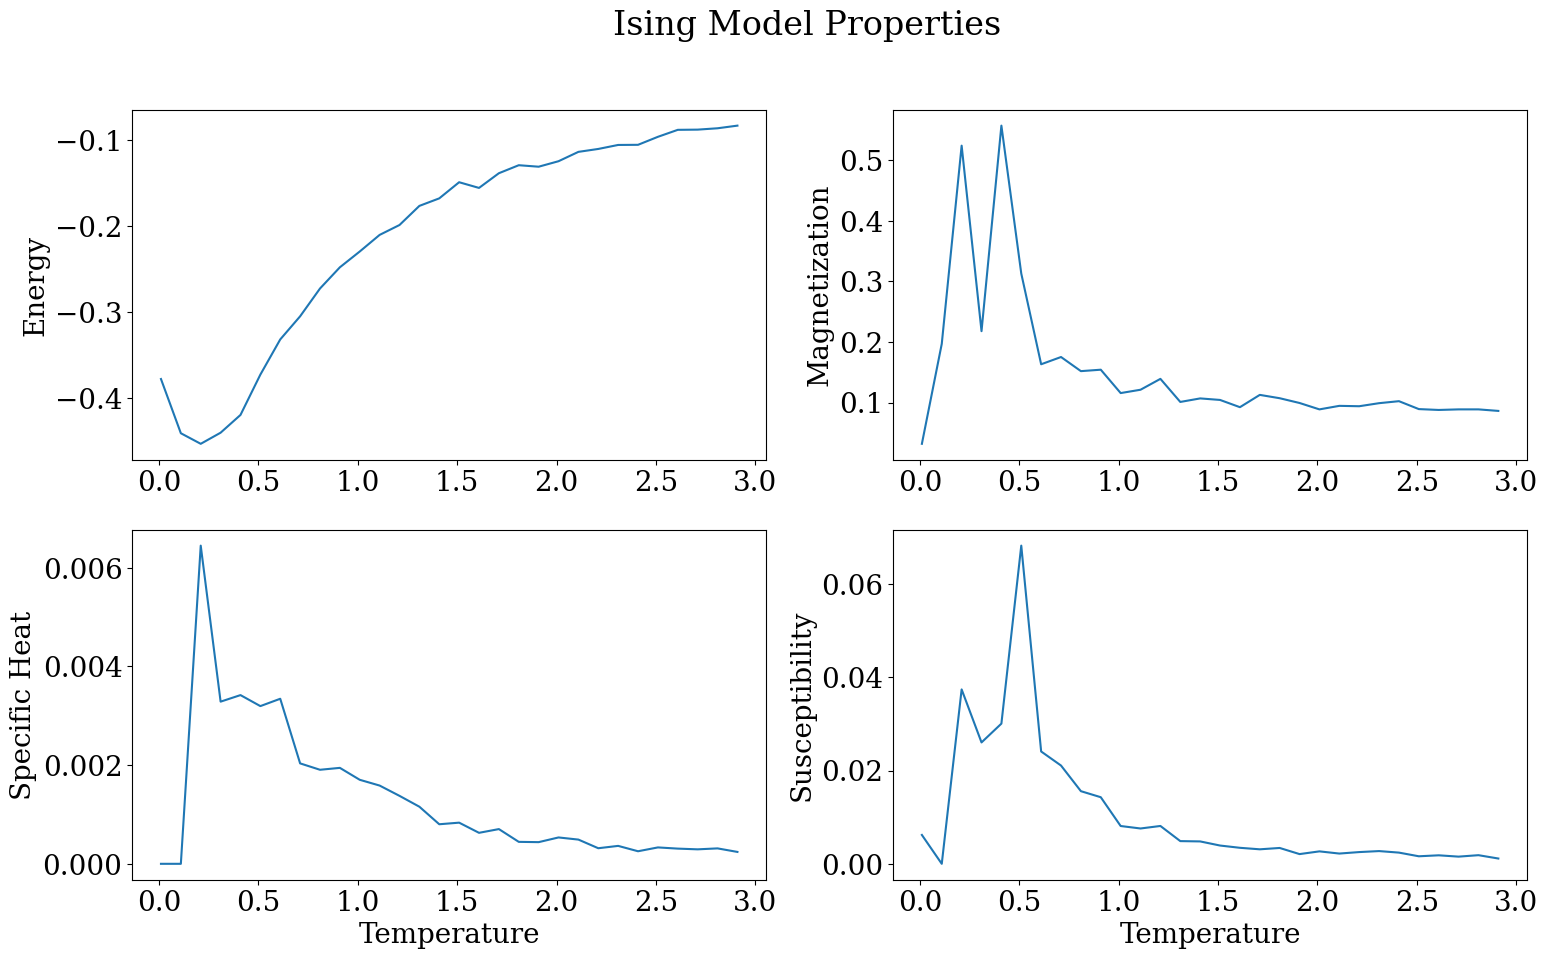

In [3]:
from utils.gen_utils import plot_magn_energy_spech_susc
plot_magn_energy_spech_susc(
    magn=magn,
    energy=energy,
    specific_heat=specific_heat,
    susceptibility=susceptibility,
    temps=temps,
    show=True
)

## Dimensional crossover of binary tree

In [31]:
from branch_sim import MamSimulation
from utils.gen_utils import graph_to_model_format, dimensional_crossover
from wandb_run import run_


In [32]:
# generate a binary tree
nodes, neighbors = create_binary_tree(depth=4)
G = to_graph(nodes, neighbors)

# dimensional crossover
G_dim = dimensional_crossover(G, n_layers=2)

# plot the graph
plot_stacked_graph(G_dim)

In [ ]:
## Simulate the structure
